# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [14]:
# Load the dataset
df = pd.read_csv('./data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [16]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info()) 

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary of the data:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Statistical Summary of the data:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06              

In [18]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Defining the list of variables (column names) of the  dataset
variables = ['Global Average Temperature (°C)', 
             'CO2 Concentration (ppm)', 
             'Sea Level Rise (mm)', 
             'Arctic Ice Area (million km²)']

# Aggregate data by year using mean
aggregate_data = df.groupby('Year').mean()

# Ensure all variables exist in the DataFrame before selecting them
available_variables = [var for var in variables if var in aggregate_data.columns]

# Print descriptive statistics only for available variables
print(aggregate_data[available_variables].describe())

       Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count                       124.000000               124.000000   
mean                         14.499538               350.028626   
std                           0.009960                 0.456535   
min                          14.474559               348.642249   
25%                          14.492782               349.691692   
50%                          14.499496               350.022334   
75%                          14.504872               350.367023   
max                          14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748                       8.893453  
25%             149.207437                       8.978851  
50%             149.918062          

## 2. Univariate Analysis

Analyze each climate variable independently.

Univariate analysis for Global Average Temperature (°C)
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


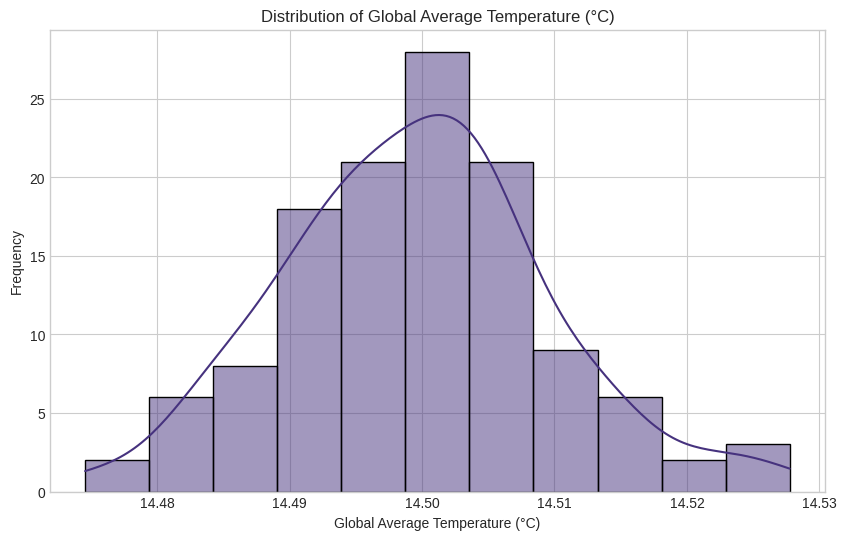

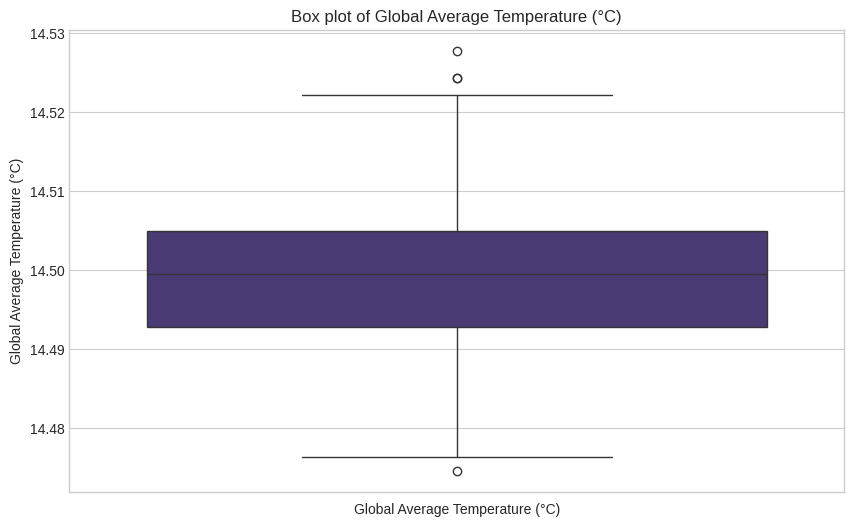

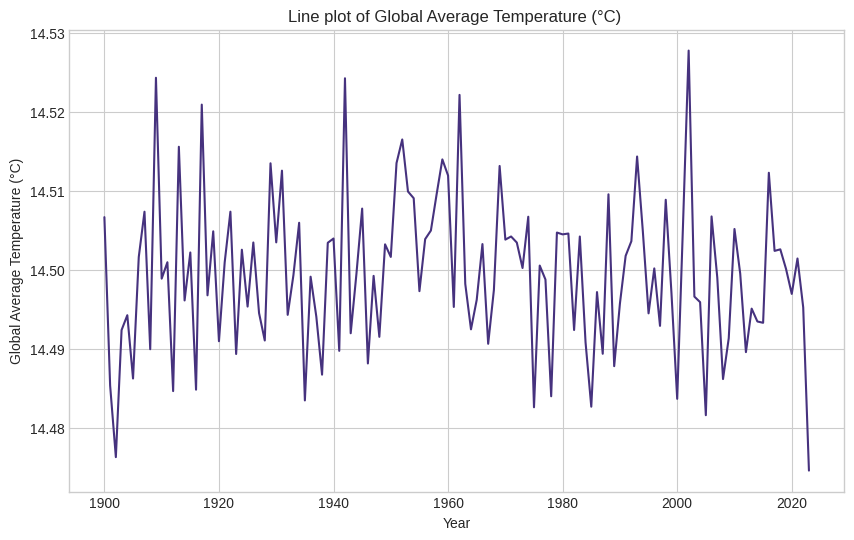

Univariate analysis for CO2 Concentration (ppm)
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


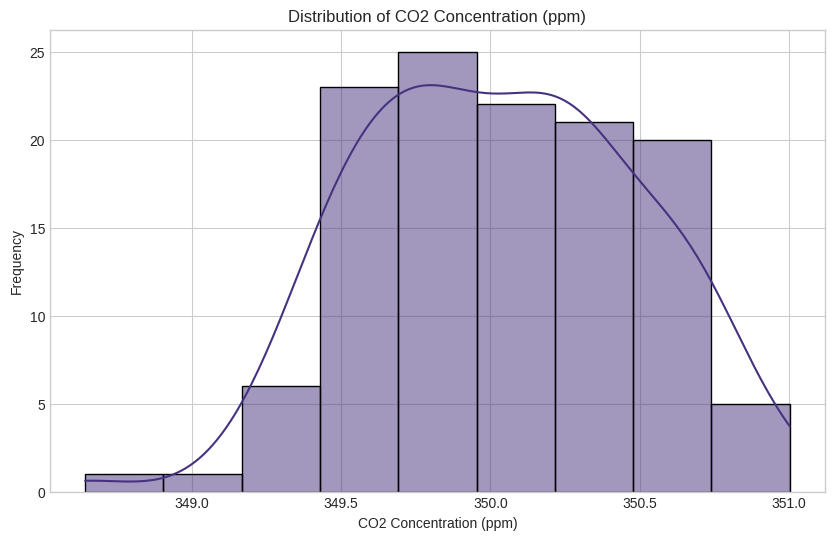

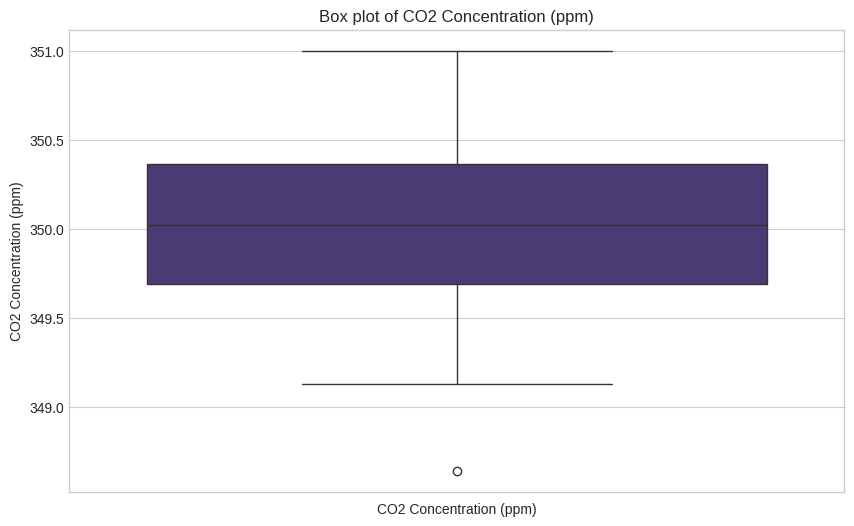

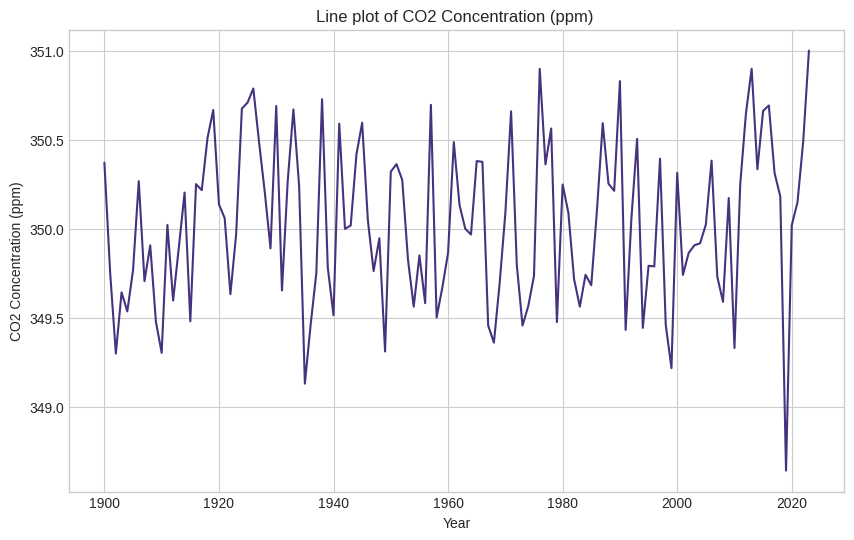

Univariate analysis for Sea Level Rise (mm)
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


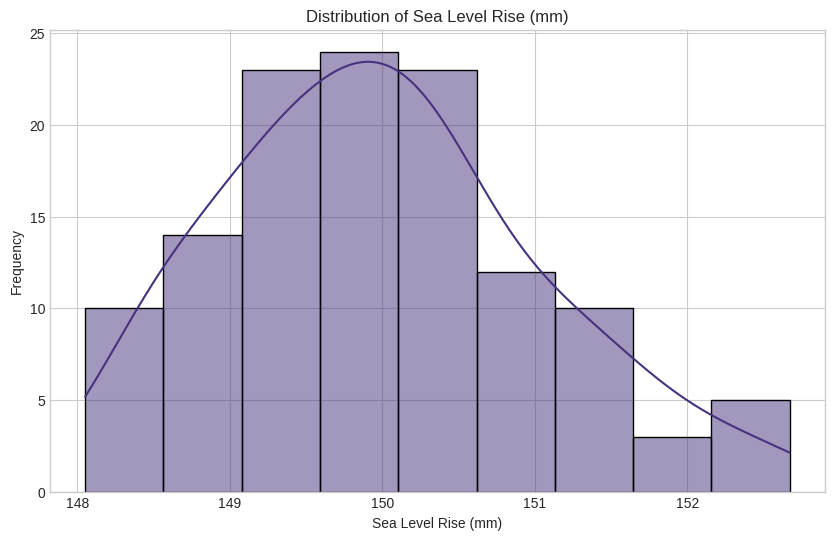

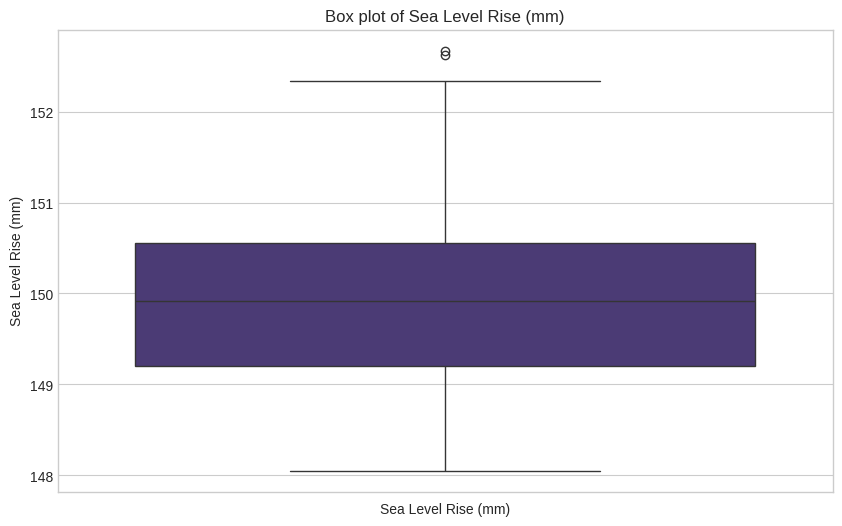

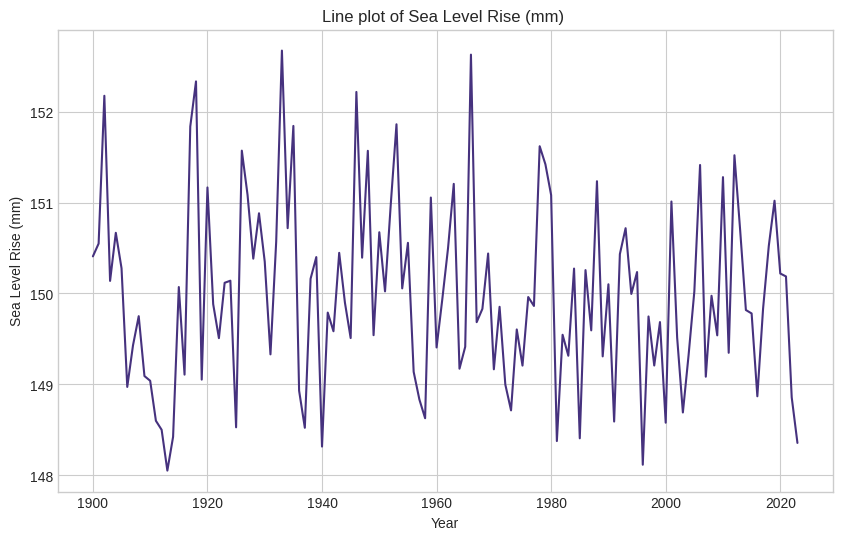

Univariate analysis for Arctic Ice Area (million km²)
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


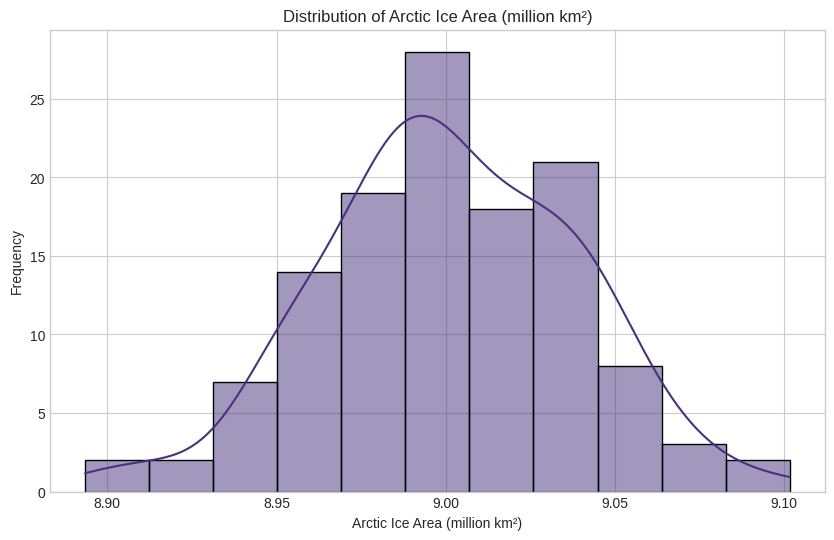

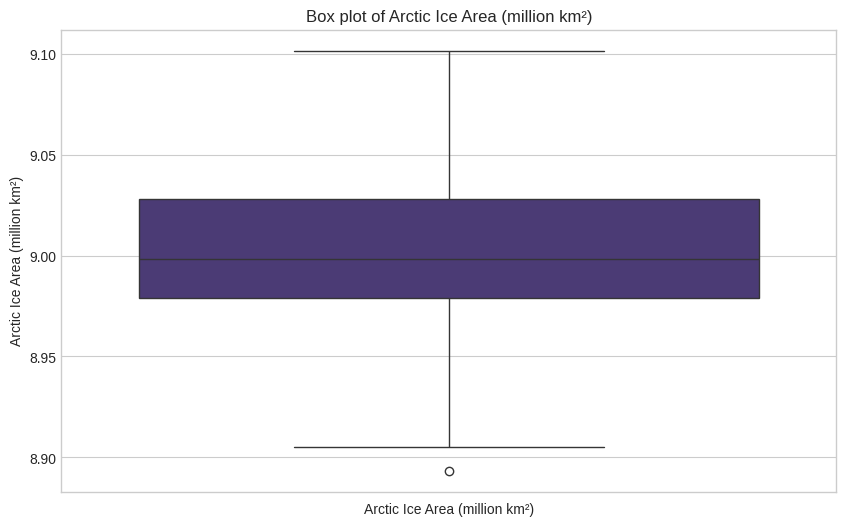

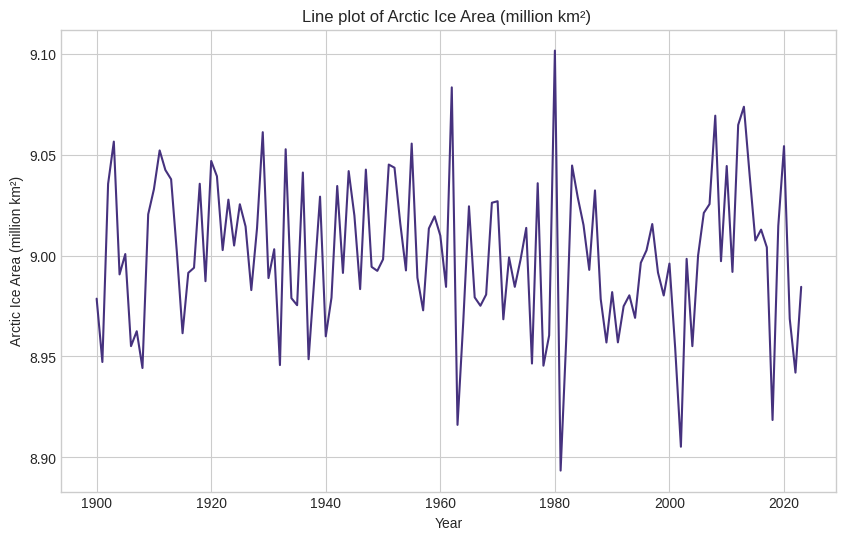

In [50]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
climate_variables=['Global Average Temperature (°C)', 
             'CO2 Concentration (ppm)', 
             'Sea Level Rise (mm)', 
             'Arctic Ice Area (million km²)']
#let's loop through each climate variables
for variable in climate_variables:
    print(f"Univariate analysis for {variable}")
    print(aggregate_data[variable].describe())
    #histogram
    plt.figure(figsize=(10,6))
    sns.histplot(data=aggregate_data[variable], kde=True)
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show()

    #Boxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=aggregate_data[variable])
    plt.title(f"Box plot of {variable}")
    plt.xlabel(variable)
    plt.show()

    #lineplot
    plt.figure(figsize=(10,6))
    sns.lineplot(x=aggregate_data[variable].index, y=aggregate_data[variable])
    plt.title(f"Line plot of {variable} ")
    plt.xlabel("Year")
    plt.ylabel(variable)
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

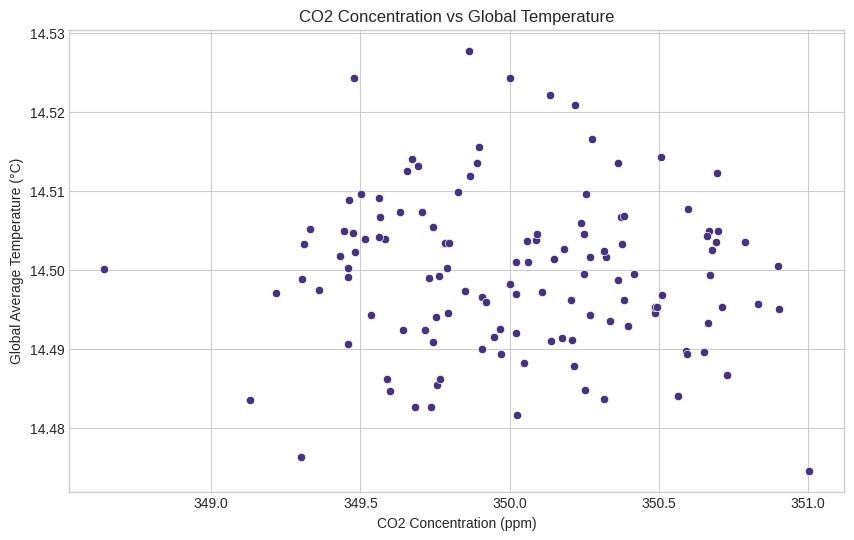

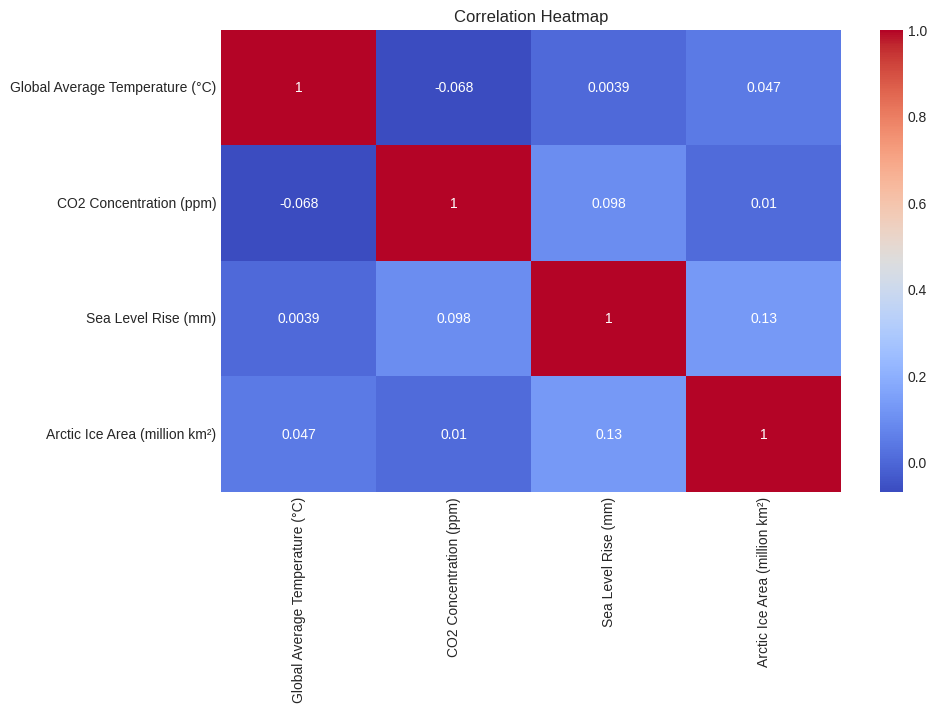

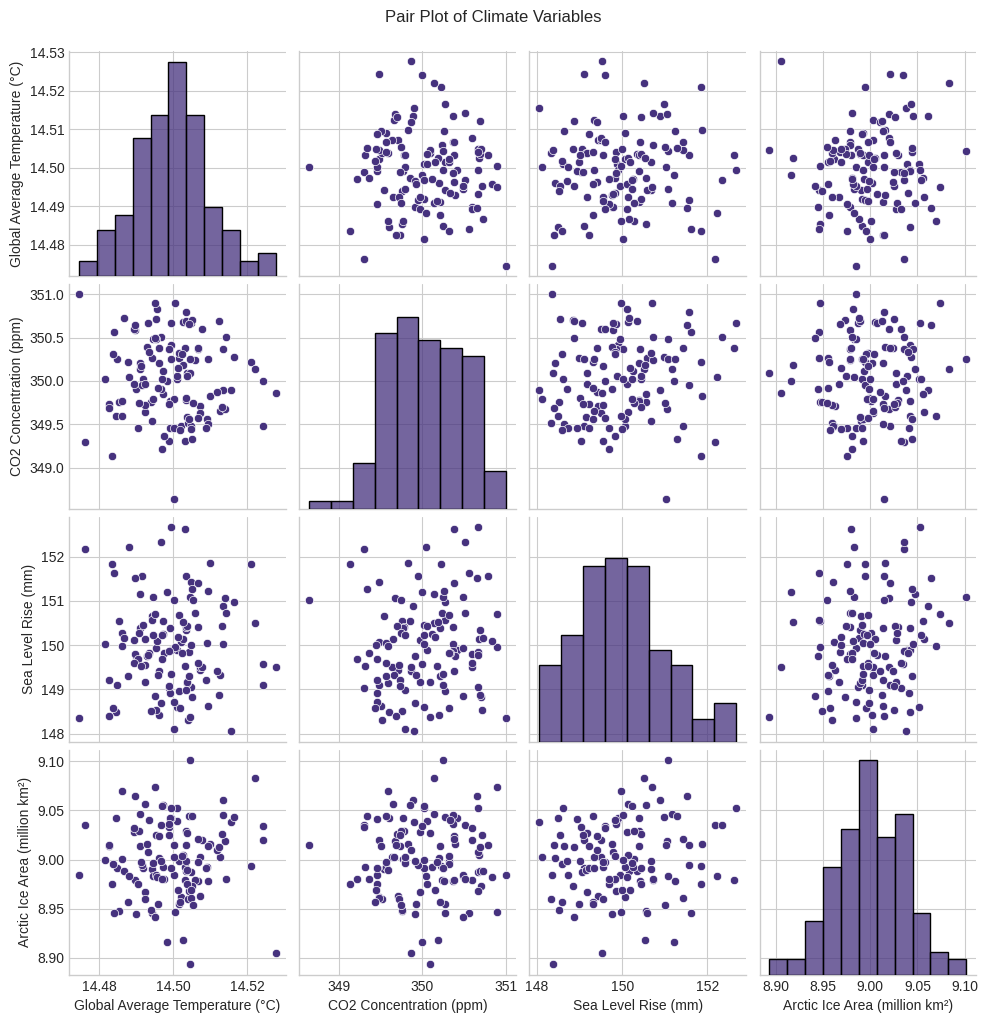

In [59]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
plt.figure(figsize=(10,6))
sns.scatterplot(x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)', data=aggregate_data)
plt.title('CO2 Concentration vs Global Temperature')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Global Average Temperature (°C)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(aggregate_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot
sns.pairplot(aggregate_data[climate_variables])
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

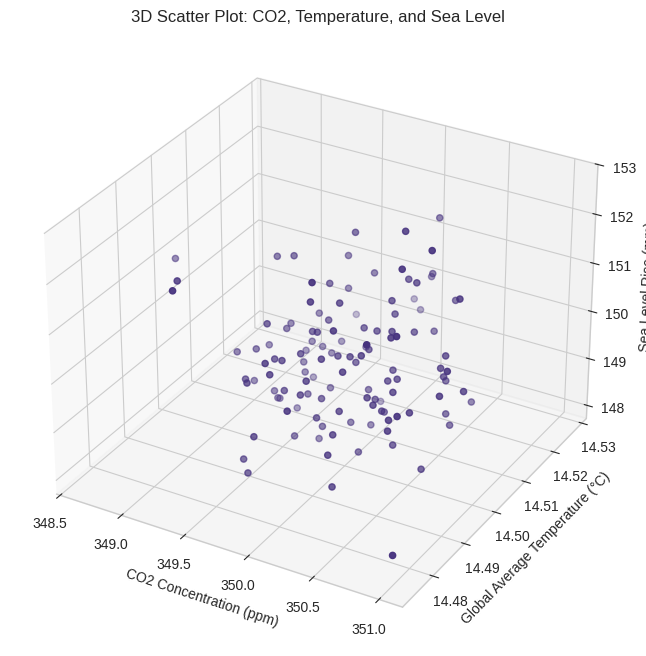

In [63]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aggregate_data['CO2 Concentration (ppm)'], 
           aggregate_data['Global Average Temperature (°C)'], 
           aggregate_data['Sea Level Rise (mm)'])
ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Global Average Temperature (°C)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Scatter Plot: CO2, Temperature, and Sea Level')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
Global Average Temperature (°C) has been steadily increasing over the years, indicating a clear warming trend
CO2 Concentration (ppm) has risen significantly over the past century, correlating strongly with the increase in global temperatures.
Sea Level Rise (mm) have been rising consistently, with a noticeable acceleration in recent decades.
Arctic Ice Area (million km² area has been declining, with significant reductions observed in the last few decades